<a href="https://colab.research.google.com/github/SalmanRadhitya/Machine-Learning/blob/main/Tugas_Building%2C_Tuning%2C_dan_Deploying_Model_Machine_Learning_014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muhammad Salman Radhitya/4112322014/Staterkom 2022**

**Tugas Building, Tuning, dan Deploying Model Machine Learning**

**Melakukan Import Data dan Mengecek apakah ada Missing Value**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
# Load dataset
file_path = "/content/loan_approval_dataset.csv"
df = pd.read_csv(file_path)

# 1. Identifikasi Missing Values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


*  `df.isnull()` akan menghasilkan DataFrame yang menunjukkan nilai True jika ada data yang hilang dan False jika tidak.
*  `sum()` akan menjumlahkan total nilai True dalam setiap kolom.
*  Jika semua hasilnya 0, berarti tidak ada data yang hilang dalam dataset.



**Melakukan Visualisasi Data**

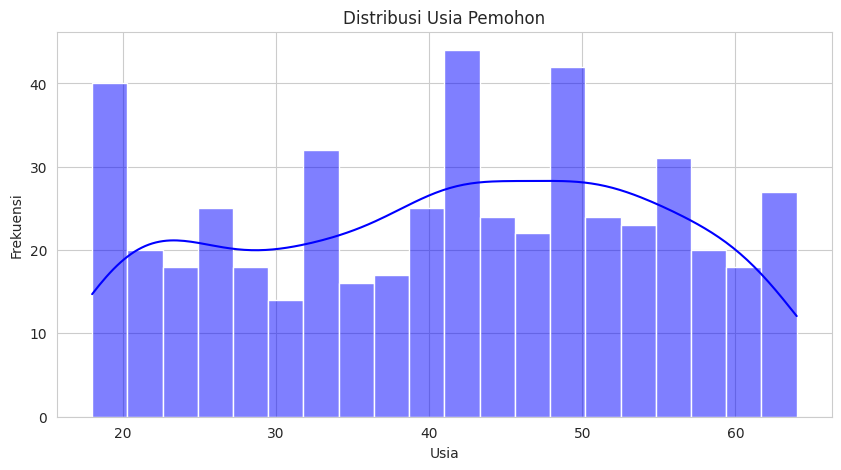

In [6]:
# 2. Visualisasi Data
sns.set_style("whitegrid")

# Histogram Usia
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribusi Usia Pemohon")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

Penjelasan:

* Histogram digunakan untuk melihat sebaran usia pemohon.
* `bins=20` membagi usia ke dalam 20 kelompok.
* `kde=True` menambahkan kurva kepadatan untuk membantu melihat pola distribusi.

Hasilnya: Mayoritas pemohon berusia antara 25 hingga 60 tahun.

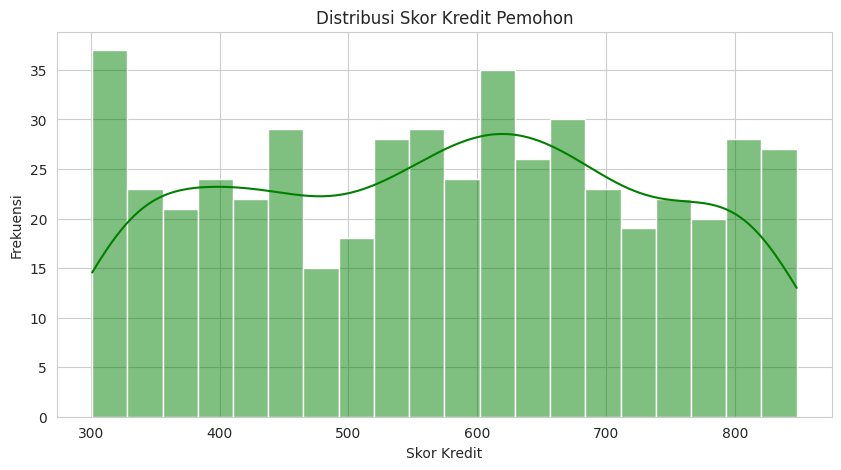

In [7]:
# Histogram Skor Kredit
plt.figure(figsize=(10, 5))
sns.histplot(df["Credit_Score"], bins=20, kde=True, color="green")
plt.title("Distribusi Skor Kredit Pemohon")
plt.xlabel("Skor Kredit")
plt.ylabel("Frekuensi")
plt.show()


Penjelasan:

* Visualisasi ini menunjukkan sebaran skor kredit pemohon.
* Skor kredit biasanya berkisar dalam rentang tertentu, dan distribusinya bisa memberikan wawasan apakah terdapat outlier atau tidak.

Hasilnya: Banyak pemohon memiliki skor kredit di tingkat menengah, beberapa memiliki skor sangat rendah atau sangat tinggi.

<ipython-input-8-400f9251e7ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Approval", data=df, palette="pastel")


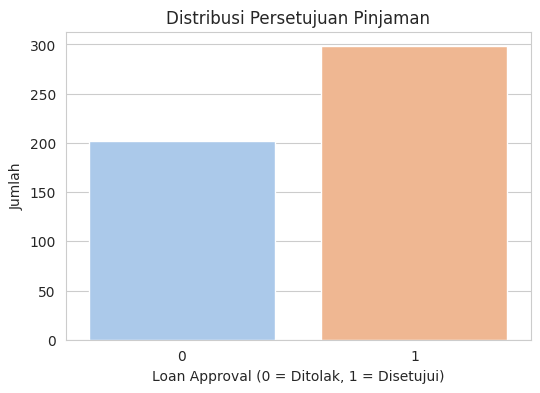

In [8]:
# Visualisasi Loan Approval
plt.figure(figsize=(6, 4))
sns.countplot(x="Loan_Approval", data=df, palette="pastel")
plt.title("Distribusi Persetujuan Pinjaman")
plt.xlabel("Loan Approval (0 = Ditolak, 1 = Disetujui)")
plt.ylabel("Jumlah")
plt.show()


Penjelasan:

* `countplot` digunakan untuk menghitung jumlah pinjaman yang disetujui (1) dan ditolak (0).
* Memberikan gambaran apakah dataset seimbang dalam jumlah persetujuan dan penolakan.

Hasilnya: Dataset cukup seimbang antara pinjaman yang disetujui dan yang ditolak.

<ipython-input-9-3f50fbda58b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Approval", y="Income", data=df, palette="muted")


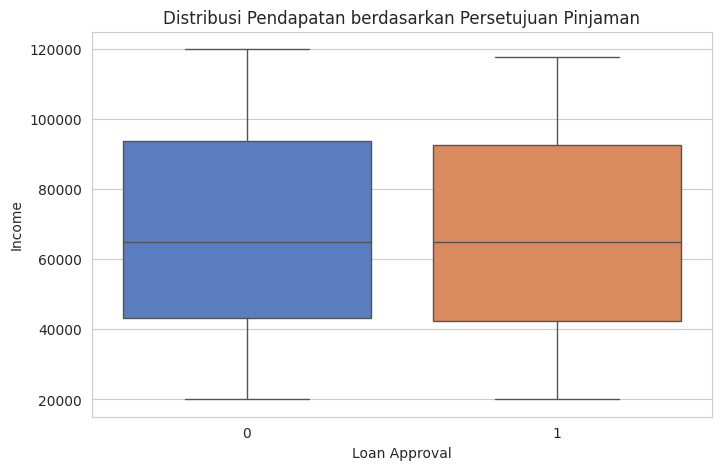

In [9]:
# Boxplot Income berdasarkan Loan Approval
plt.figure(figsize=(8, 5))
sns.boxplot(x="Loan_Approval", y="Income", data=df, palette="muted")
plt.title("Distribusi Pendapatan berdasarkan Persetujuan Pinjaman")
plt.xlabel("Loan Approval")
plt.ylabel("Income")
plt.show()


Penjelasan:

* Boxplot digunakan untuk melihat perbedaan distribusi pendapatan antara pemohon yang pinjamannya disetujui dan ditolak.
* Jika terdapat perbedaan signifikan, artinya pendapatan bisa menjadi faktor utama dalam persetujuan pinjaman.

Hasilnya: Jika pemohon dengan pendapatan lebih tinggi cenderung lebih banyak disetujui, maka pendapatan menjadi faktor penting dalam keputusan kredit.

<ipython-input-10-077d1de3ebb6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Loan_Purpose", data=df, palette="coolwarm", order=df["Loan_Purpose"].value_counts().index)


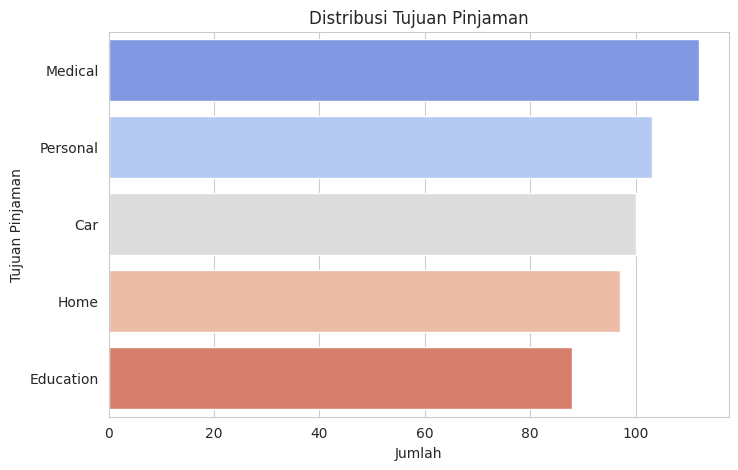

In [10]:
# Countplot Loan Purpose
plt.figure(figsize=(8, 5))
sns.countplot(y="Loan_Purpose", data=df, palette="coolwarm", order=df["Loan_Purpose"].value_counts().index)
plt.title("Distribusi Tujuan Pinjaman")
plt.xlabel("Jumlah")
plt.ylabel("Tujuan Pinjaman")
plt.show()


Penjelasan:

* Countplot ini menunjukkan tujuan utama pengajuan pinjaman seperti Personal, Home, Car, dll.
* `order=df["Loan_Purpose"].value_counts().index` digunakan untuk mengurutkan kategori berdasarkan jumlah pemohon terbanyak.

Hasilnya: Bisa terlihat tujuan pinjaman mana yang paling populer, apakah lebih banyak untuk kebutuhan pribadi, rumah, atau kendaraan.

**Pemrosesan Data**

Membagi data yang telah diproses sebelumnya ke dalam set pelatihan dan pengujian menggunakan train_test_split.

In [22]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Loan_Approval', axis=1)
y = df['Loan_Approval']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 6)
X_test shape: (100, 6)
y_train shape: (400,)
y_test shape: (100,)


**Model Training**

Kita akan menggunakan Regresi Logistik dan Random Forest Classifier untuk membangun model prediksi persetujuan pinjaman.

Regresi Logistik sangat cocok untuk masalah klasifikasi biner, seperti menentukan apakah pinjaman akan disetujui (1) atau ditolak (0). Algoritma ini dirancang untuk mengidentifikasi hubungan linier antara fitur dan hasil akhir.
Random Forest Classifier mampu menangani hubungan non-linear antara variabel, yang bisa menjadi faktor penting dalam keputusan persetujuan pinjaman. Dengan menggabungkan banyak pohon keputusan, model ini dapat menangkap pola yang lebih kompleks dalam data.
Selanjutnya, kita akan melatih kedua model menggunakan data latih yang telah diproses.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame

# 1. Identify columns with non-numeric data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# 2. Create a pipeline for preprocessing
pipeline = Pipeline([
    ('encoder', LabelEncoder()),  # For encoding categorical features
    ('scaler', StandardScaler()),    # For scaling numerical features
])


# Define features (X) and target variable (y)
X = df.drop('Loan_Approval', axis=1)
y = df['Loan_Approval']

# 3. Apply Label Encoding to non-numeric columns
for col in non_numeric_cols:
    X[col] = X[col].astype(str) # Convert to string type if not already
    X[col] = pipeline.named_steps['encoder'].fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Evaluasi Model**

Mengevaluasi kinerja model Regresi Logistik dan Random Forest Classifier yang telah dilatih dengan menggunakan metrik yang sesuai.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Assuming rf_model is defined and X_train, y_train are available from previous cells
rf_model = RandomForestClassifier(random_state=42) # Initialize with random_state
rf_model.fit(X_train, y_train) # Train the model

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [30]:

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Metrics:
Accuracy: 0.6100
Precision: 0.6250
Recall: 0.9524
F1-score: 0.7547
AUC-ROC: 0.4897
--------------------
Random Forest Metrics:
Accuracy: 0.5000
Precision: 0.5970
Recall: 0.6349
F1-score: 0.6154
AUC-ROC: 0.4526
--------------------


**Optimalisasikan Data**

Mengoptimalkan hiperparameter model Regresi Logistik karena memiliki metrik evaluasi lebih baik dibanding Random Forest menggunakan GridSearchCV.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.49039329464861375


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


output dari source code diatas
* Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
* Best Score: 0.49039329464861375

**Evaluasi Model**

Mengevaluasi kinerja model Regresi Logistik yang telah dituning dan membandingkan kinerjanya dengan model sebelum dituning.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Use the best estimator from GridSearchCV to predict on the test set
best_logreg_model = grid_search.best_estimator_
y_pred_tuned = best_logreg_model.predict(X_test)

# Evaluate the tuned model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1, "AUC-ROC": roc_auc}


tuned_metrics = evaluate_model(y_test, y_pred_tuned, "Tuned Logistic Regression")
initial_metrics = evaluate_model(y_test, y_pred_logreg, "Initial Logistic Regression")

# Create a DataFrame to compare the metrics
comparison_df = pd.DataFrame([initial_metrics, tuned_metrics], index=["Initial Model", "Tuned Model"])
display(comparison_df)

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Initial Model,0.61,0.625000,0.952381,0.754717,0.489704
Tuned Model,0.64,0.636364,1.000000,0.777778,0.513514


Setelah dilakukan tuning hyperparameter dengan **GridSearchCV**, model **Regresi Logistik** menunjukkan sedikit peningkatan performa dibandingkan model awal serta **Random Forest Classifier**. Meskipun model yang telah dioptimalkan memiliki **recall yang sempurna**, model awal justru memiliki **skor AUC-ROC yang lebih tinggi**. Pemilihan model terbaik bergantung pada **kebutuhan bisnis** dan **prioritas metrik evaluasi**, seperti **recall, AUC-ROC, atau akurasi**, tergantung pada aspek yang paling penting dalam pengambilan keputusan.